In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Fill in the missing code
The following script is an implementation of a logistic regression model for a binary classification problem. The dataset contains four numerical input attributes and one output attribute (class label 0 or 1).

- Columns **Attribute1**, **Attribute2**, **Attribute3**, and **Attribute4** are inputs.
- Column **OutputClass** is output.

The missing pieces of code are indicated like so: `#write your code here#`.

The functions corresponding to said missing code are stated in the description above each function.

To complete the task, replace `#write your code here#` with the your own code. Also, ensure that the program executes without any warnings or errors.

In [2]:
# Reading CSV file as pandas dataframe
data = pd.read_csv("Full_Data.csv")

data_X = data.values[:, :-1]
data_Y = data.values[:, -1].astype("int")

# Splitting dataset into training and test set
X_full, test_X_full, Y, test_Y = train_test_split(data_X, data_Y, test_size=0.4, shuffle=True, random_state=1)

Try out different input column indexes as input data. For instance, if you choose to use input columns 2 and 3; replace `#write your code here#` with `1, 2` (resp.) in the code block below.

Example:
* `attr1 = 1`
* `attr2 = 2`

Note column 1 (i.e., column index = 0) is `RowIdx`, and should not be used as an input.

Also note, *column index = column number - 1*.

In [3]:
# Removing all columns other than two
attr1 =0 #write your code here#
attr2 =1 #write your code here#
X = X_full[:, (attr1, attr2)]
test_X = test_X_full[:, (attr1, attr2)]

Text(0, 0.5, 'Attribute 2')

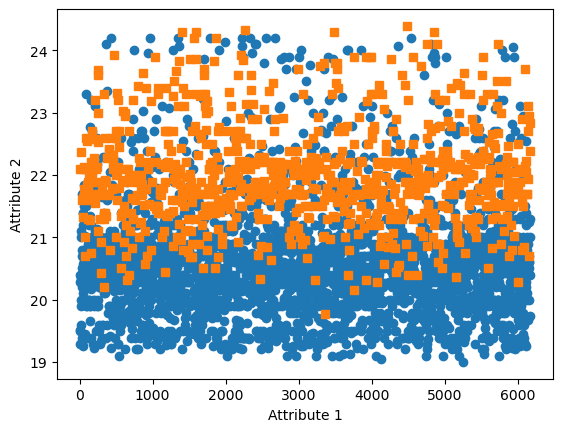

In [4]:
# Ploting attributes
plt.plot(X[:, 0][Y==0], X[:, 1][Y==0], "o")
plt.plot(X[:, 0][Y==1], X[:, 1][Y==1], "s")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")

The code block below constructs $\mathbf{X}$. Note that $\mathbf{X}$ includes $x_0 = 1$ column for the bias (i.e., intercept).

In [5]:
# Combining input data with fabricated output class
X = np.hstack((np.ones((X.shape[0], 1)), X))
print("The regenerated input data has class labels set to 1:\n", X)

The regenerated input data has class labels set to 1:
 [[1.000e+00 5.788e+03 2.154e+01]
 [1.000e+00 1.339e+03 2.007e+01]
 [1.000e+00 5.844e+03 2.134e+01]
 ...
 [1.000e+00 3.981e+03 2.389e+01]
 [1.000e+00 2.360e+02 1.989e+01]
 [1.000e+00 5.158e+03 2.347e+01]]


## Logistic Regression Model

For Logistic Regression, our hypothesis is 
$$
\hat{Y} = h_w(x) = \frac{1}{1+e^{-(w^{T}x)}}
$$
The output range of $\hat{Y}$ is between 0 and 1.

### Sigmoid Function

The Sigmoid function squishes all its inputs (i.e., values on x-axis) between 0 and 1.
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

In [6]:
# Defining sigmoid function
def sigmoid(z):
    # z --> input
    # sigmoid_z --> output of sigmoid function
    z = z.astype(float)
    sigmoid_z =1 / (1 + np.exp(-z)) #write your code here#
    
    return sigmoid_z

The cost function for Logistic Regression for binary classification:
$$
J(data, w) = \frac{1}{n}\sum_{i=1}^{n} L(\hat{Y}^{(i)},Y^{(i)}) = -\frac{1}{n}\sum_{i=1}^{n} [Y^{(i)}log(\hat{Y}^{(i)}) + (1-Y^{(i)})log(1-\hat{Y}^{(i)})]
$$

This loss is also called binary cross entropy error.

In [7]:
# Defining loss function
def loss(Y, y_hat):
    # Y --> data
    # y_hat --> w
    loss =(Y * np.log(y_hat) + (1 - Y) * np.log(1 - y_hat)).mean() #write your code here#
    
    return -loss

### Gradient of the loss function

Using the Gradient Descent Algorithm, optimal values of the parameters can be calculated like so ($\eta$ →learning rate), the update rules for parameters are as follows:
$$
w_{t+1} = w_{t} - \eta*dw
$$
Where $dw$ is the partial derivative of loss w.r.t parameter $w$. It looks like:
$$
dw = \frac{1}{n} * (\hat{y}-y).\textbf{X}
$$

In [8]:
# Defining gradient function
def gradients(X, Y, y_hat):
    # X --> input
    # Y --> true/target value
    # y_hat --> hypothesis/predictions
    # n --> number of training examples
    
    n = X.shape[0]
    
    # Gradient of loss w.r.t weights
    dw =np.dot(X.T, (y_hat - Y)) / n #write your code here#
    
    return dw

Normalize the data before using/computing gradient. It can accelerate the training process. Make sure you don"t normalize the "bias" term (i.e., first column).

In [9]:
# Defining data normalization function
def normalize(X):
    # X --> input
    # n --> number of training examples
    # d --> number of features 
    n, d = X.shape
    
    # Normalizing all the d features of X (except the bias (first) column)
    for i in range(d-1):
        X[:,i+1] = (X[:,i+1] - X[:,i+1].mean(axis=0))/X[:,i+1].std(axis=0)
        
    return X

### Prediction

Now that the functions to learn the parameters are ready, check if the hypothesis ($\hat{Y}$) is able to predict the output class $Y=1$ or $Y=0$. Note that the hypothesis is the probability of $Y$ being 1 given $\textbf{X}$ and is parameterized by $w$.

Hence, the prediction function will be so —
$$
\hat{Y} = 1 \to w^{T}\textbf{X}
\geq 0
$$
$$
\hat{Y} = 0  \to w^{T}\textbf{X} < 0
$$

In [10]:
# Defining prediction function
def predict(X,w):
    # X --> Input.
    
    # Normalizing the inputs.
    X = normalize(X)
    
    # Calculating prediction/y_hat.
    preds = sigmoid(np.dot(X, w))
    
    # Empty List to store predictions.
    pred_class = []
    for pred in preds:
        if pred >= 0.33:
            pred_class.append(1)
        else:
            pred_class.append(0)
    
    return np.array(pred_class)
# Naveen

The decision boundary will be:
$$
\hat{Y} = 0.5 \quad or \quad w^{T}\textbf{X} = 0
$$

In [11]:
# Defining function to plot decision boundary
def plot_decision_boundary(X,w):
    ydisp = -(w[0] + w[1] * X)/w[2]
    
    fig = plt.figure(figsize=(10, 8))
    plt.plot(X[:, 1][Y==0], X[:, 2][Y==0], "^")
    plt.plot(X[:, 1][Y==1], X[:, 2][Y==1], "s")
    
    plt.xlim([-2, 5])
    plt.ylim([-2, 5])
    plt.xlabel("Attribute 1")
    plt.ylabel("Attribute 2")
    plt.title("Decision Boundary")
    plt.plot(X, ydisp)

Now that all the required blocks for logistic regression model are ready, encode the model.

In [12]:
# Defining training function
def train(X, Y, epochs, eta):
    # X --> input
    # Y --> true/target value
    # bs --> batch size
    # eta --> learning rate
    # n-> number of training examples
    # d-> number of features 
    
    n, d = X.shape
    
    # Initializing weights and bias to zeros
    w = np.zeros((d,1))
    
    # Reshaping Y
    Y = Y.reshape(n,1)
    
    # Normalizing the inputs
    X = normalize(X)
    
    # Empty list to store losses
    losses = []
    
    # Training loop
    for epoch in range(epochs):
        
            # Calculating hypothesis/prediction
            y_hat =sigmoid(np.dot(X, w)) #write your code here#
            
            # Getting the gradients of loss w.r.t parameters
            dw =gradients(X, Y, y_hat) #write your code here#
            
            # Updating the parameters.
            w = w- eta*dw
            
            # Calculating loss and appending it in the list
            l =loss(Y, y_hat) #write your code here#
            losses.append(l)
        
    # Returning weights, losses(List)
    return w, losses

Train the model and print the results.

Try out different learning rates to improve model performance.

Example: `w, l = train(X, Y, epochs=100, eta=0.001)`

In [13]:
# Training model 
w, l = train(X, Y, epochs=100, eta=0.1)#write your code here#)

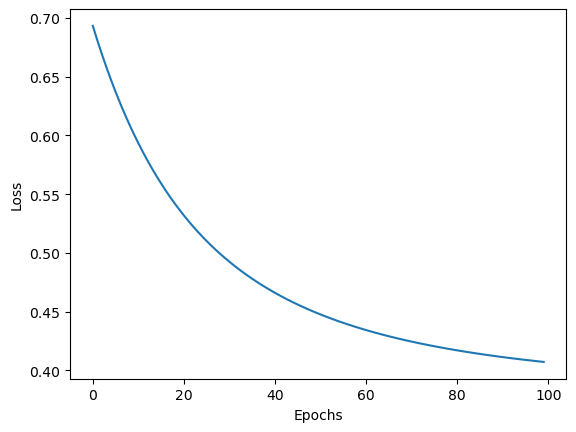

In [14]:
# Plotting loss vs. epoch function
plt.plot(l)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [15]:
# Printing training accuracy
print("The accuracy of model is",(np.sum(1*(Y==predict(X,w)))/len(Y))*100,"%")

The accuracy of model is 85.16216216216216 %


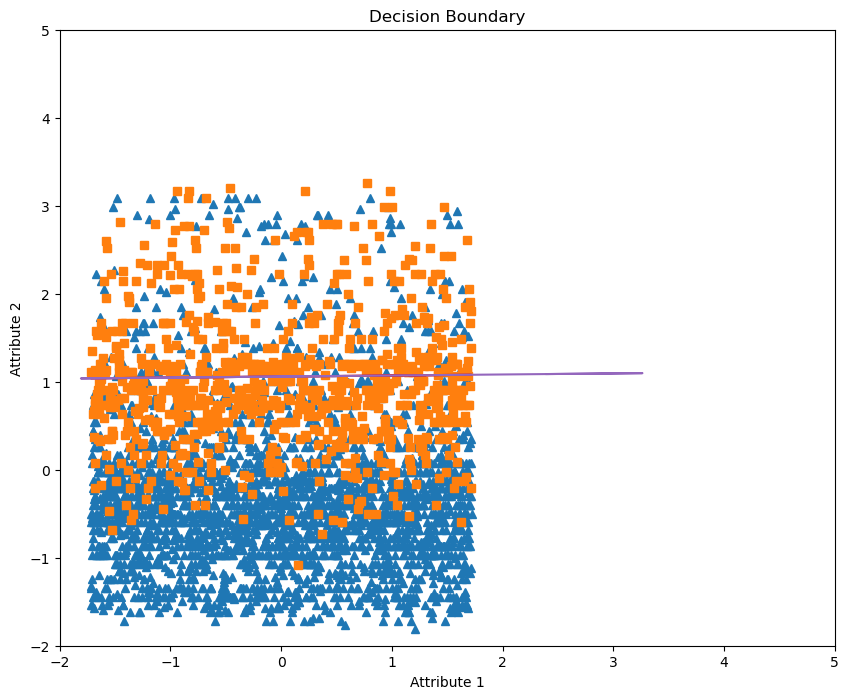

In [16]:
# Plotting the decision boundary
plot_decision_boundary(X, w)

Run the test data through the trained model, and print the testing accuracy.

In [17]:
# Checking test accuracy
test_X = np.hstack((np.ones((test_X.shape[0],1)), test_X))
ml_predictions = predict(test_X,w)
print("The test accuracy of model is",(np.sum(1*(test_Y==ml_predictions))/len(test_Y))*100,"%")

The test accuracy of model is 84.84602917341977 %


In [18]:
# Exporting results
row_idx = np.concatenate((test_X_full[:, 0].astype(int), X_full[:, 0].astype(int)))
opt_cls = np.concatenate((ml_predictions.astype(int), Y.astype(int)))
                              
output_data = np.concatenate((row_idx.reshape(-1,1), opt_cls.reshape(-1,1)), axis=1)
pd.DataFrame(output_data, columns=["RowIdx", "OutputClass"]).to_csv("Output_Data.csv", index=False)

### My Conclusion:
What is **Decision boundary**?<br>
A hyperplane that partitions the feature space into distinct classes is known as a decision boundary. In binary classification problems, the decision boundary serves as the line of demarcation between positive and negative classes. The position and orientation of the decision boundary are determined by the model's training data and algorithm. The primary aim is to discover a decision boundary that can effectively generalize to new data, making it a reliable predictor.
If  `Decision boundary` :
$$
\hat{Y} = 0.6 \quad or \quad w^{T}\textbf{X} = 0
$$
Then *`Train Accuracy`* is 77.64864864864865 % and `*Test accuracy*` is 79.4165316045381 %<br>
If  `Decision boundary` :
$$
\hat{Y} = 0.5 \quad or \quad w^{T}\textbf{X} = 0
$$
Then `*Train Accuracy*` is 80.86486486486486 % and `*Test accuracy*` is 81.84764991896273 %<br>
If  `Decision boundary` :
$$
\hat{Y} = 0.4 \quad or \quad w^{T}\textbf{X} = 0
$$
Then `*Train Accuracy*` is 84.54054054054055 % and `*Test accuracy*` is 83.83306320907617 %<br>
If  `Decision boundary` :
$$
\hat{Y} = 0.38 \quad or \quad w^{T}\textbf{X} = 0
$$
Then `*Train Accuracy*` is 84.56756756756756 % and `*Test accuracy*` is 83.99513776337115 %<br>
If  `Decision boundary` :
$$
\hat{Y} = 0.35 \quad or \quad w^{T}\textbf{X} = 0
$$
Then `*Train Accuracy*` is 85.1081081081081 % and `*Test accuracy*` is 84.84602917341977 %<br>
If  `Decision boundary` :
$$
\hat{Y} = 0.34 \quad or \quad w^{T}\textbf{X} = 0
$$
Then `*Train Accuracy*` is 85.13513513513513 % and `*Test accuracy*` is 84.84602917341977 %<br>
If  `Decision boundary` :
$$
\hat{Y} = 0.3 \quad or \quad w^{T}\textbf{X} = 0
$$
Then `*Train Accuracy*` is 84.83783783783784 % and `*Test accuracy*` is 83.6709886547812 %<br>
If  `Decision boundary` :
$$
\hat{Y} = 0.28 \quad or \quad w^{T}\textbf{X} = 0
$$
Then `*Train Accuracy*` is 82.72972972972973 % and `*Test accuracy*` is 81.36142625607779 %<br>

In [19]:
decision_boundaries = [0.6, 0.5, 0.4, 0.38, 0.35, 0.34, 0.3, 0.28]
train_accuracy = [77.65, 80.86, 84.54, 84.57, 85.11, 85.14, 84.84, 82.73]
test_accuracy = [79.42, 81.85, 83.83, 83.99, 84.85, 84.85, 83.67, 81.36]

In [20]:
import pandas as pd

data = {
    'Decision Boundary': decision_boundaries,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
}

df = pd.DataFrame(data)
df.head(8)


,Decision Boundary,Train Accuracy,Test Accuracy
0,0.60,77.65,79.42
1,0.50,80.86,81.85
2,0.40,84.54,83.83
3,0.38,84.57,83.99
4,0.35,85.11,84.85
5,0.34,85.14,84.85
6,0.30,84.84,83.67
7,0.28,82.73,81.36


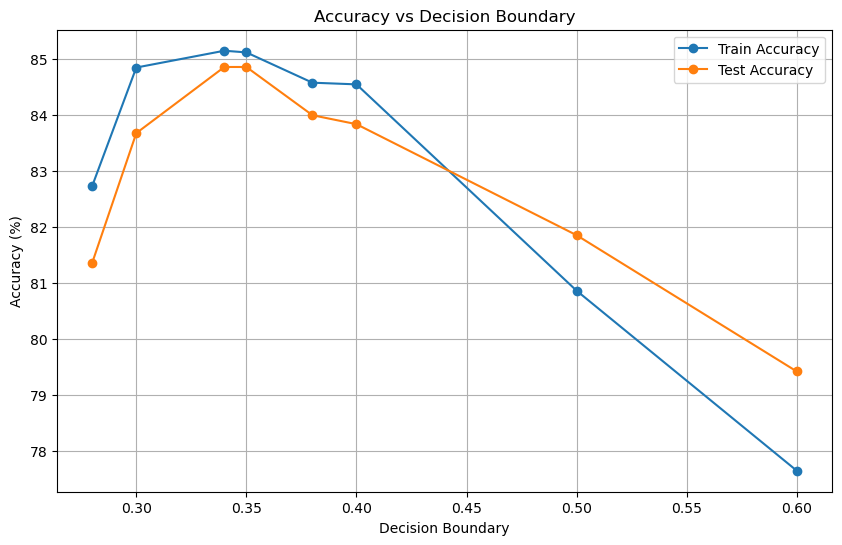

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(decision_boundaries, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(decision_boundaries, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Decision Boundary')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()